### Pre requisites

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

### import packages

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load the file 

In [4]:
df = pd.read_csv("./crime_data.csv")
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Preprocessing the data 

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [8]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3) 
kmeans = kmeans.fit(df)

In [10]:
kmeans.labels_

array([0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
kmeans.cluster_centers_


array([[ 10.90714286, 219.92857143,  71.71428571,  25.95      ],
       [  4.74074074, 104.85185185,  62.96296296,  16.1       ],
       [ 12.07777778, 292.        ,  63.66666667,  29.28888889]])

In [12]:
kmeans.cluster_centers_[0]

array([ 10.90714286, 219.92857143,  71.71428571,  25.95      ])

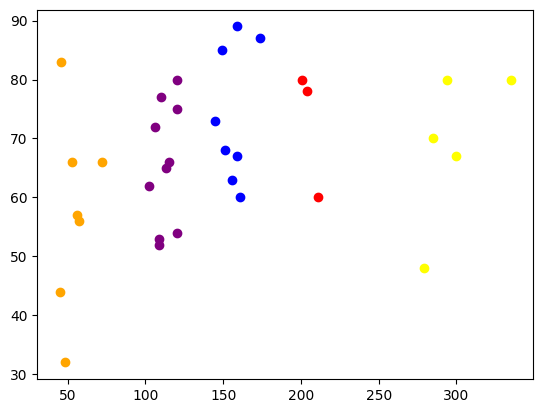

In [35]:
plt.scatter(df['Assault'][kmeans.labels_==0], df['UrbanPop'][kmeans.labels_==0], color="red")
plt.scatter(df['Assault'][kmeans.labels_==1], df['UrbanPop'][kmeans.labels_==1], color="purple")
plt.scatter(df['Assault'][kmeans.labels_==2], df['UrbanPop'][kmeans.labels_==2], color="yellow") 
plt.scatter(df['Assault'][kmeans.labels_==3], df['UrbanPop'][kmeans.labels_==3], color="orange") 
plt.scatter(df['Assault'][kmeans.labels_==4], df['UrbanPop'][kmeans.labels_==4], color="blue")

In [14]:
from sklearn.cluster import KMeans

# create a list to get the within sum of squares for difrerent no of clusters
wss = []

# create a loop to find the wss for different no of clusters
for k in range(1, 10):

    # create KMeans object
    kmeans = KMeans(n_clusters=k)

    # fit the data
    clusters_info = kmeans.fit(df)

    # collect the wss for k
    wss.append(clusters_info.inertia_)

In [15]:
wss

[355807.8216,
 96399.02814449917,
 47964.26535714285,
 34728.629357142854,
 27657.160890756306,
 21739.509790598288,
 18107.948634920638,
 17238.480031746032,
 13921.90180952381]

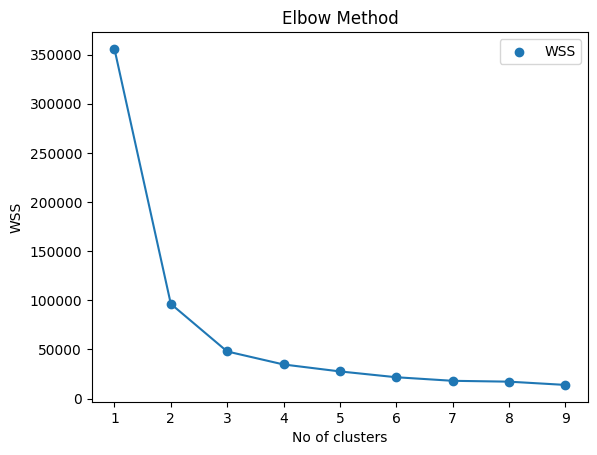

In [16]:
plt.scatter(range(1, 10), wss, label="WSS")
plt.plot(range(1, 10), wss)
plt.xlabel("No of clusters")
plt.ylabel("WSS")
plt.title("Elbow Method")
plt.legend()

In [23]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
cluster_info = AgglomerativeClustering(n_clusters=5)

# build the clusters
cluster_info = cluster_info.fit(df)

In [24]:
cluster_info.labels_

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0])

In [25]:
clusters_info.cluster_centers_

array([[ 12.66666667, 205.33333333,  72.66666667,  30.        ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 12.12      , 298.6       ,  69.        ,  29.06      ],
       [  2.55714286,  53.85714286,  57.71428571,  12.17142857],
       [  5.75      , 156.75      ,  74.        ,  19.4       ],
       [ 11.54      , 253.1       ,  70.3       ,  29.26      ],
       [  3.86666667,  83.33333333,  45.        ,   9.96666667],
       [ 13.        , 337.        ,  45.        ,  16.1       ],
       [ 10.33333333, 185.33333333,  59.66666667,  24.86666667]])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


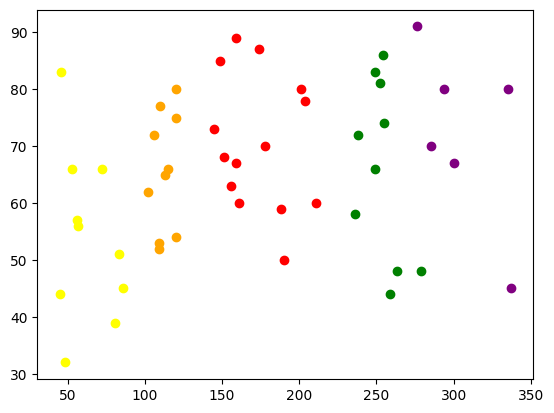

In [32]:
plt.scatter(df['Assault'][cluster_info.labels_==0], df['UrbanPop'][cluster_info.labels_==0], color='red')
plt.scatter(df['Assault'][cluster_info.labels_==1], df['UrbanPop'][cluster_info.labels_==1], color='green')
plt.scatter(df['Assault'][cluster_info.labels_==2], df['UrbanPop'][cluster_info.labels_==2], color='purple')
plt.scatter(df['Assault'][cluster_info.labels_==3], df['UrbanPop'][cluster_info.labels_==3], color='orange')
plt.scatter(df['Assault'][cluster_info.labels_==4], df['UrbanPop'][cluster_info.labels_==4], color='yellow')

In [33]:
from sklearn.cluster import DBSCAN

# create an object of DBScan
dbscan = DBSCAN(eps=0.15, min_samples=5)

# fit the data
dbscan = dbscan.fit(df)

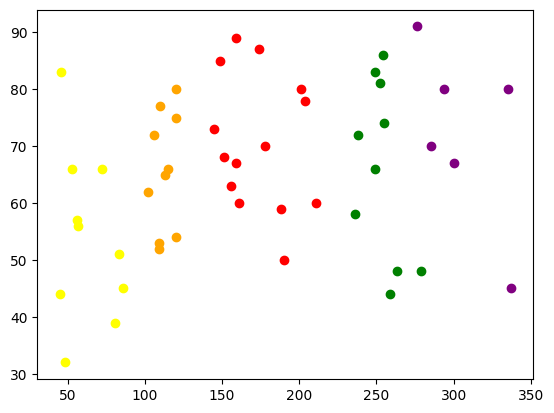

In [34]:
plt.scatter(df['Assault'][cluster_info.labels_==0], df['UrbanPop'][cluster_info.labels_==0], color='red')
plt.scatter(df['Assault'][cluster_info.labels_==1], df['UrbanPop'][cluster_info.labels_==1], color='green')
plt.scatter(df['Assault'][cluster_info.labels_==2], df['UrbanPop'][cluster_info.labels_==2], color='purple')
plt.scatter(df['Assault'][cluster_info.labels_==3], df['UrbanPop'][cluster_info.labels_==3], color='orange')
plt.scatter(df['Assault'][cluster_info.labels_==4], df['UrbanPop'][cluster_info.labels_==4], color='yellow')